## Illia Tsuprun KA-14mp, IASA, KPI, var. 11
## Course: decision making in hierarchical systems
## Tutor: N.Nedashkivska

# Аналіз чутливості розв’язку задачі підтримки прийняття рішень

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

sys.path.append('python_modules') ## not my libraty, it was stolen. Author: N.Nedashkivska
import structureHierachy as hierBuilder
import calculationHierarchy as hierCalculator

### Завдання:
- Розрахувати глобальні ваги альтернатив методом мультиплікативного синтезу (згідно з варіантом).
- Дослідити чутливість глобальних ваг альтернатив до змін ваг критеріїв графічними методами: АЧ виконання.
- Визначити діапазони змін ваг критеріїв, які призводять до змін рангів альтернатив. 
- Розрахувати ступені чутливості.
- Знайти найбільш чутливі та стійкі критерії.

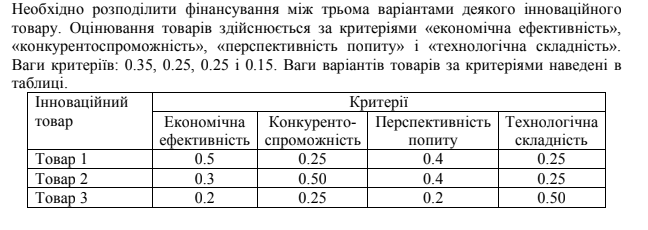

# Задаємо їєрархію

In [2]:
def get_criteria(hier):
    root = hier[sorted(hier)[0]]
    
    criteria_ids = root['Childs']
    criteria = [hier[crit_id] for crit_id in criteria_ids]
    criteria_weights = root['LocalW']
    return criteria, criteria_weights

def get_alternatives(hier):
    alternatives = []
    
    for elem_id in hier:
        elem = hier[elem_id]
        if elem['Childs'] == []:
            alternatives.append(elem)
    
    return alternatives

In [3]:
def hier_to_df(hier):
    hier_df = pd.DataFrame()
    
    criteria, criteria_weights = get_criteria(hier)
    alternatives = get_alternatives(hier)
    
    for crit, weight in zip(criteria, criteria_weights):
        column_name = crit['Name'] + ' '  + str(weight)
        local_weights = crit['LocalW']
        
        hier_df[column_name] = local_weights 

    hier_df.index = [alt['Name'] for alt in alternatives]
    global_weights = [alt['GlobW'] for alt in alternatives]
    hier_df['Global weights'] = global_weights
    return hier_df

In [4]:
hier = {
    ## головна ціль
    "E0_0": {'GlobW': 1, 'LocalW': [0.35, 0.25, 0.25, 0.15], 'About': 'Головна ціль: розподіл фінансування', 'IdLevel': 0, 'Parents': [], 'Name': 'Root', 'Childs': ['E1_0', 'E1_1', 'E1_2', 'E1_3'], 'PCM': []},
    
    ## критерії
    "E1_0": {'GlobW': 1, 'LocalW': [0.50, 0.30, 0.20], 'About': 'Економічна ефективність', 'IdLevel': 1, 'Parents': ['E0_0'], 'Name': 'Економічна ефективність', 'Childs': ['E2_0', 'E2_1', 'E2_2'], 'PCM': []},
    "E1_1": {'GlobW': 1, 'LocalW': [0.25, 0.50, 0.25], 'About': 'Конкурентноспроможність', 'IdLevel': 1, 'Parents': ['E0_0'], 'Name': 'Конкурентноспроможність', 'Childs': ['E2_0', 'E2_1', 'E2_2'], 'PCM': []},
    "E1_2": {'GlobW': 1, 'LocalW': [0.40, 0.40, 0.20], 'About': 'Перспективность попиту', 'IdLevel': 1, 'Parents': ['E0_0'], 'Name': 'Перспективность допиту', 'Childs': ['E2_0', 'E2_1', 'E2_2'], 'PCM': []},
    "E1_3": {'GlobW': 1, 'LocalW': [0.25, 0.25, 0.50], 'About': 'Технологічна складність', 'IdLevel': 1, 'Parents': ['E0_0'], 'Name': 'Технологічна складність', 'Childs': ['E2_0', 'E2_1', 'E2_2'], 'PCM': []},
    
    ## альтернативи
    "E2_0": {'GlobW': 1, 'LocalW': [], 'About': 'Товар 1', 'IdLevel': 2, 'Parents': ['E1_0', 'E1_1', 'E1_2', 'E1_3'], 'Name': 'Товар 1', 'Childs': [], 'PCM': []},
    "E2_1": {'GlobW': 1, 'LocalW': [], 'About': 'Товар 2', 'IdLevel': 2, 'Parents': ['E1_0', 'E1_1', 'E1_2', 'E1_3'], 'Name': 'Товар 2', 'Childs': [], 'PCM': []},
    "E2_2": {'GlobW': 1, 'LocalW': [], 'About': 'Товар 3', 'IdLevel': 2, 'Parents': ['E1_0', 'E1_1', 'E1_2', 'E1_3'], 'Name': 'Товар 3', 'Childs': [], 'PCM': []}
}

In [5]:
hier_to_df(hier)

Економічна ефективність 0.35  Конкурентноспроможність 0.25  \
Товар 1                           0.5                          0.25   
Товар 2                           0.3                          0.50   
Товар 3                           0.2                          0.25   

         Перспективность допиту 0.25  Технологічна складність 0.15  \
Товар 1                          0.4                          0.25   
Товар 2                          0.4                          0.25   
Товар 3                          0.2                          0.50   

         Global weights  
Товар 1               1  
Товар 2               1  
Товар 3               1

# Розраховуємо глобальні ваги

In [6]:
methodGlobWs = "Multiplicative"
hierCalculator.findAllGlobalWs(hier, methodGlobWs)
hier_df = hier_to_df(hier)
hier_df

The hierarchy has 3 levels
The hierarchy has 3 levels


Економічна ефективність 0.35  Конкурентноспроможність 0.25  \
Товар 1                           0.5                          0.25   
Товар 2                           0.3                          0.50   
Товар 3                           0.2                          0.25   

         Перспективность допиту 0.25  Технологічна складність 0.15  \
Товар 1                          0.4                          0.25   
Товар 2                          0.4                          0.25   
Товар 3                          0.2                          0.50   

         Global weights  
Товар 1        0.374313  
Товар 2        0.372259  
Товар 3        0.253427

# Дослідити чутливість глобальних ваг альтернатив до змін ваг критеріїв графічними методами: АЧ виконання

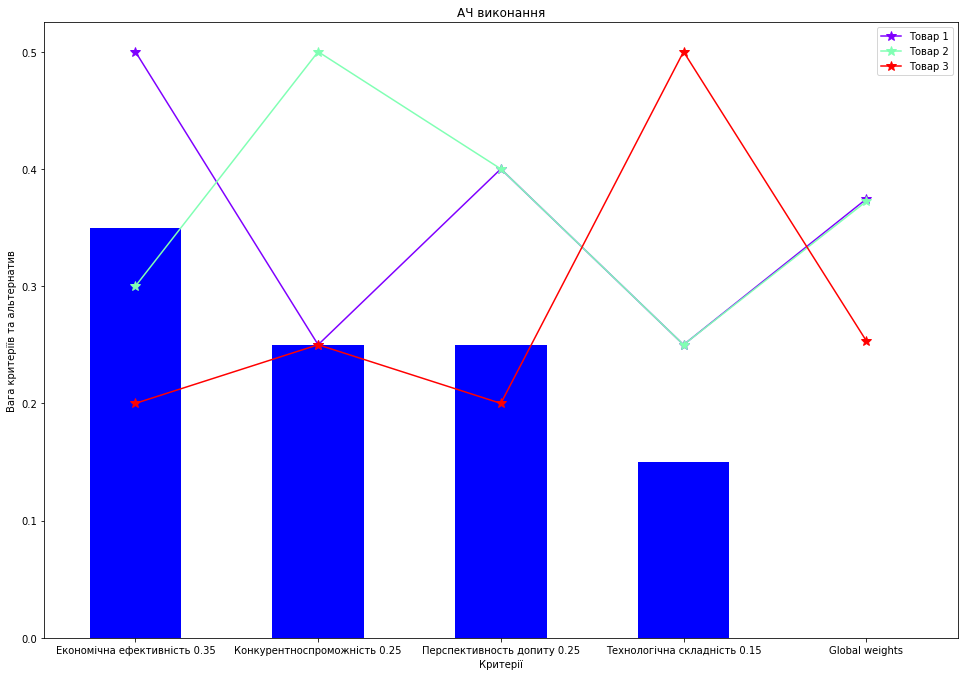

In [8]:
def build_sensitivity_plot(hier_df, criteria_weights):
    plt.rcParams["figure.figsize"] = [13.50, 9.50]
    plt.rcParams["figure.autolayout"] = True
    pd.DataFrame(criteria_weights + [0]).plot(kind='bar', 
                                              color = 'blue', 
                                              title = 'АЧ виконання',
                                              legend = False,
                                              xlabel = 'Критерії', 
                                              ylabel = 'Вага критеріїв та альтернатив')

    indexes = hier_df.index
    colors = cm.rainbow(np.linspace(0,
                                    1, 
                                    len(indexes)))
    for index, color in zip(indexes,  colors):
        hier_df.loc[index].plot(kind='line', 
                                marker='*', 
                                color = color, 
                                ms=10, 
                                legend = True)
    plt.show()
    
criteria, criteria_weights = get_criteria(hier)
build_sensitivity_plot(hier_df, criteria_weights)

### По перше, варто відзначити, що глобальні ваги альтернатив "Товар 1" та "Товар 2" є практично однаковими, але перша альтернатива все ж є більш переважною. 
### Однак, якщо поглянути на критерії, то лише за критеріями "Перспективи допиту" та "Технологічна складність" дані альтернативи мають однакове виконання. 
### За критеріями "Економічна ефективність" та "Конкурентноспроможність"  інтервали між оптимальною альтернативою "Товар 1" і дуже близькою альтернативою "Товар 2" є досить великими. Це дуже важлива інформація. Так, наприклад, для альтернативи "Товар 2", при невеликому збільшенні ваги критерієм "Конкурентноспроможність" вона може стати оптимальною, так само як і альтернатива "Товар 2" може дуже сильно відірватись, якщо вага критерія "Економічна ефективність". 

# Визначити діапазони змін ваг критеріїв, які призводять до змін рангів альтернатив. Розрахувати ступені чутливості. Знайти найбільш чутливі та стійкі критерії.
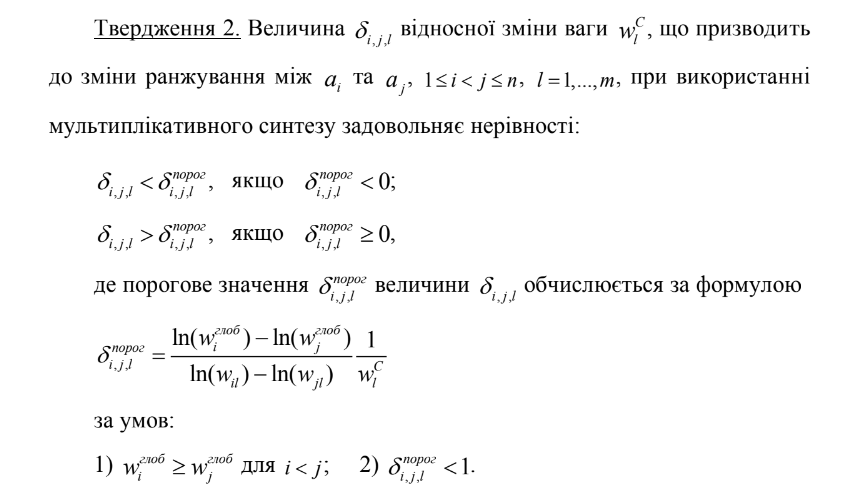

## Розрахуємо порогові значення відносної зміни ваги критерію

In [9]:
def get_threshold_df(hier, hier_df):
    criteria, criteria_weights = get_criteria(hier)
    alternatives = get_alternatives(hier)

    local_weights = hier_df.iloc[:,:-1]
    global_weights = hier_df.iloc[:, -1]
    n_alts, n_crits = local_weights.shape

    threshold = {}
    threshold_df = pd.DataFrame(columns = [crit['Name'] for crit in criteria])
    threshold_df.index.name = 'Пара альтернатив'
    threshold_df.columns.name = 'Порогові значення відносної зміни ваги критерію, %'

    for i in range(n_alts):
        for j in range(n_alts):
            if i >= j:
                continue
            threshold_values = []
            for l in range(n_crits):
                threshold_value = (np.log(global_weights[i]) - np.log(global_weights[j])) / ((np.log(local_weights.iloc[i][l]) - np.log(local_weights.iloc[j][l])) * criteria_weights[l])
                threshold_values.append(np.round(threshold_value*100, 2))
            alt_1 = alternatives[i]['Name']
            alt_2 = alternatives[j]['Name']
            threshold_df.loc[str((alt_1, alt_2))] = threshold_values
    return threshold_df

threshold_df = get_threshold_df(hier, hier_df)

/tmp/ipykernel_537255/1143440016.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  threshold_value = (np.log(global_weights[i]) - np.log(global_weights[j])) / ((np.log(local_weights.iloc[i][l]) - np.log(local_weights.iloc[j][l])) * criteria_weights[l])


In [10]:
threshold_df

Порогові значення відносної зміни ваги критерію, %  Економічна ефективність  \
Пара альтернатив                                                              
('Товар 1', 'Товар 2')                                                 3.08   
('Товар 1', 'Товар 3')                                               121.61   
('Товар 2', 'Товар 3')                                               270.95   

Порогові значення відносної зміни ваги критерію, %  Конкурентноспроможність  \
Пара альтернатив                                                              
('Товар 1', 'Товар 2')                                                -3.18   
('Товар 1', 'Товар 3')                                                  inf   
('Товар 2', 'Товар 3')                                               221.89   

Порогові значення відносної зміни ваги критерію, %  Перспективность допиту  \
Пара альтернатив                                                             
('Товар 1', 'Товар 2')                                                 inf   
('Товар 1', 'Товар 3')                                              225.07   
('Товар 2', 'Товар 3')                                              221.89   

Порогові значення відносної зміни ваги критерію, %  Технологічна складність  
Пара альтернатив                                                             
('Товар 1', 'Товар 2')                                                  inf  
('Товар 1', 'Товар 3')                                              -375.12  
('Товар 2', 'Товар 3')                                              -369.82

### Додатнє значення величини порогу свідчить про те, що вага критерію має бути зменшена для зміни ранжування між альтернативами. Від'ємне значення,навпаки, свідчить про те що вага критерію має бути збільшена.

## Розрахуємо діапазони відносної зміни ваги критерію для зміни ранжування альтернатив

In [11]:
def get_intervals(x):
    if np.isinf(x): 
        return 'Стійка вага'
    else:
        if np.abs(x) > 0 and np.abs(x) <= 100:
            if x  > 0: 
                return f'Зменшення на [{np.abs(x)}% - 100%]'
            else:
                return f'Збільшення на [{np.abs(x)}% - 100%]'
        else:
            if x > 0:
                return f'Стійка вага. Необхідно зменшення на {np.abs(x)}% +'
            else:
                return f'Стійка вага. Необхідно збільшення на {np.abs(x)}% +'
            
def get_intervals_df(threshold_df):
    intervals_df = threshold_df.copy()
    intervals_df.columns.name = 'Діапазони відносної зміни ваги критерію для зміни ранжування альтернатив'
    for column in intervals_df.columns:
        intervals_df[column] = intervals_df[column].apply(get_intervals)
    return intervals_df

intervals_df = get_intervals_df(threshold_df)
intervals_df

Діапазони відносної зміни ваги критерію для зміни ранжування альтернатив                        Економічна ефективність  \
Пара альтернатив                                                                                                          
('Товар 1', 'Товар 2')                                                                      Зменшення на [3.08% - 100%]   
('Товар 1', 'Товар 3')                                                    Стійка вага. Необхідно зменшення на 121.61% +   
('Товар 2', 'Товар 3')                                                    Стійка вага. Необхідно зменшення на 270.95% +   

Діапазони відносної зміни ваги критерію для зміни ранжування альтернатив                        Конкурентноспроможність  \
Пара альтернатив                                                                                                          
('Товар 1', 'Товар 2')                                                                     Збільшення на [3.18% - 100%]   
('Товар 1', 'Товар 3')                                                                                      Стійка вага   
('Товар 2', 'Товар 3')                                                    Стійка вага. Необхідно зменшення на 221.89% +   

Діапазони відносної зміни ваги критерію для зміни ранжування альтернатив                         Перспективность допиту  \
Пара альтернатив                                                                                                          
('Товар 1', 'Товар 2')                                                                                      Стійка вага   
('Товар 1', 'Товар 3')                                                    Стійка вага. Необхідно зменшення на 225.07% +   
('Товар 2', 'Товар 3')                                                    Стійка вага. Необхідно зменшення на 221.89% +   

Діапазони відносної зміни ваги критерію для зміни ранжування альтернатив                         Технологічна складність  
Пара альтернатив                                                                                                          
('Товар 1', 'Товар 2')                                                                                       Стійка вага  
('Товар 1', 'Товар 3')                                                    Стійка вага. Необхідно збільшення на 375.12% +  
('Товар 2', 'Товар 3')                                                    Стійка вага. Необхідно збільшення на 369.82% +

## Розрахуємо ступені чутливості.

In [12]:
def get_sensitivity_level_df(threshold_df):
    abs_threshold_df = threshold_df.apply(lambda x: abs(x))
    sensitivity_level_series = abs_threshold_df.min(axis = 0)
    sensitivity_level_df = pd.concat(
        [sensitivity_level_series, 1/sensitivity_level_series],
        axis = 1
    )
    sensitivity_level_df.columns = ['CritVal, %', 'SenvVal']
    sensitivity_level_df.columns.name = 'Ступені чутливості критеріїв'
    sensitivity_level_df.index.name = 'Критерій'
    return sensitivity_level_df

sensitivity_level_df = get_sensitivity_level_df(threshold_df)

In [13]:
sensitivity_level_df

Ступені чутливості критеріїв  CritVal, %   SenvVal
Критерій                                          
Економічна ефективність             3.08  0.324675
Конкурентноспроможність             3.18  0.314465
Перспективность допиту            221.89  0.004507
Технологічна складність           369.82  0.002704

# Висновки:

### Відносні значення змін ваг критеріїв, що призводять до зміни отриманого ранжування (порогові значення) -  наведені в таблиці вище. 

### Найбільш чутливий критерій для зміни оптимальної альтернативи визначається як мінімальне за модулем значення відносних змін ваг в рядках, що відповідають оптимальній альтернативі "Товар 1". Це мінімальне значення (рівне 3.08 % ) відповідає критерію "Економічна еффективність" при розгляді альтернатив "Товар 1" та "Товар 2". Зменшення ваги критерію більш ніж на 3.08% призводить до зміни оптимальної альтернативи, нею стає альтернатива "Товар 2".

### Також варто відзначити, що критерій "Конкурентоспроможність" також є досить чутливим. Збільшення ваги критерію більш ніж на 3.18% призводить до зміни оптимальної альтернативи, нею стає альтернатива "Товар 2". Можна сказати, що підтвердились припущення, зроблені на основі графічного аналізу АЧ виконання. 

### Критерій "Економічна ефективність" - найбільш чутливий до зміни ваги, за ним іде критерій "Конкурентноспроможність", потім досить стійкий критерій "Перспективность попиту" і стійкіший за всіх - "Технологічна складність"